In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:

adata_one_sample = sc.read("FGW_plots_bone_marrow_results_one_sample.h5ad")
adata_outer_coupling = sc.read("outer_coupling.h5ad")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
def adapt_cell_type(x):
    if x["batch"] == "RNA":
        return np.nan
    return x["cell_type"]
adata_one_sample.obs["predicted_cell_type_only"] = adata_one_sample.obs.apply(adapt_cell_type, axis=1)

In [11]:
sc.pp.neighbors(adata_one_sample, use_rep="X_translated_0")
sc.tl.umap(adata_one_sample)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


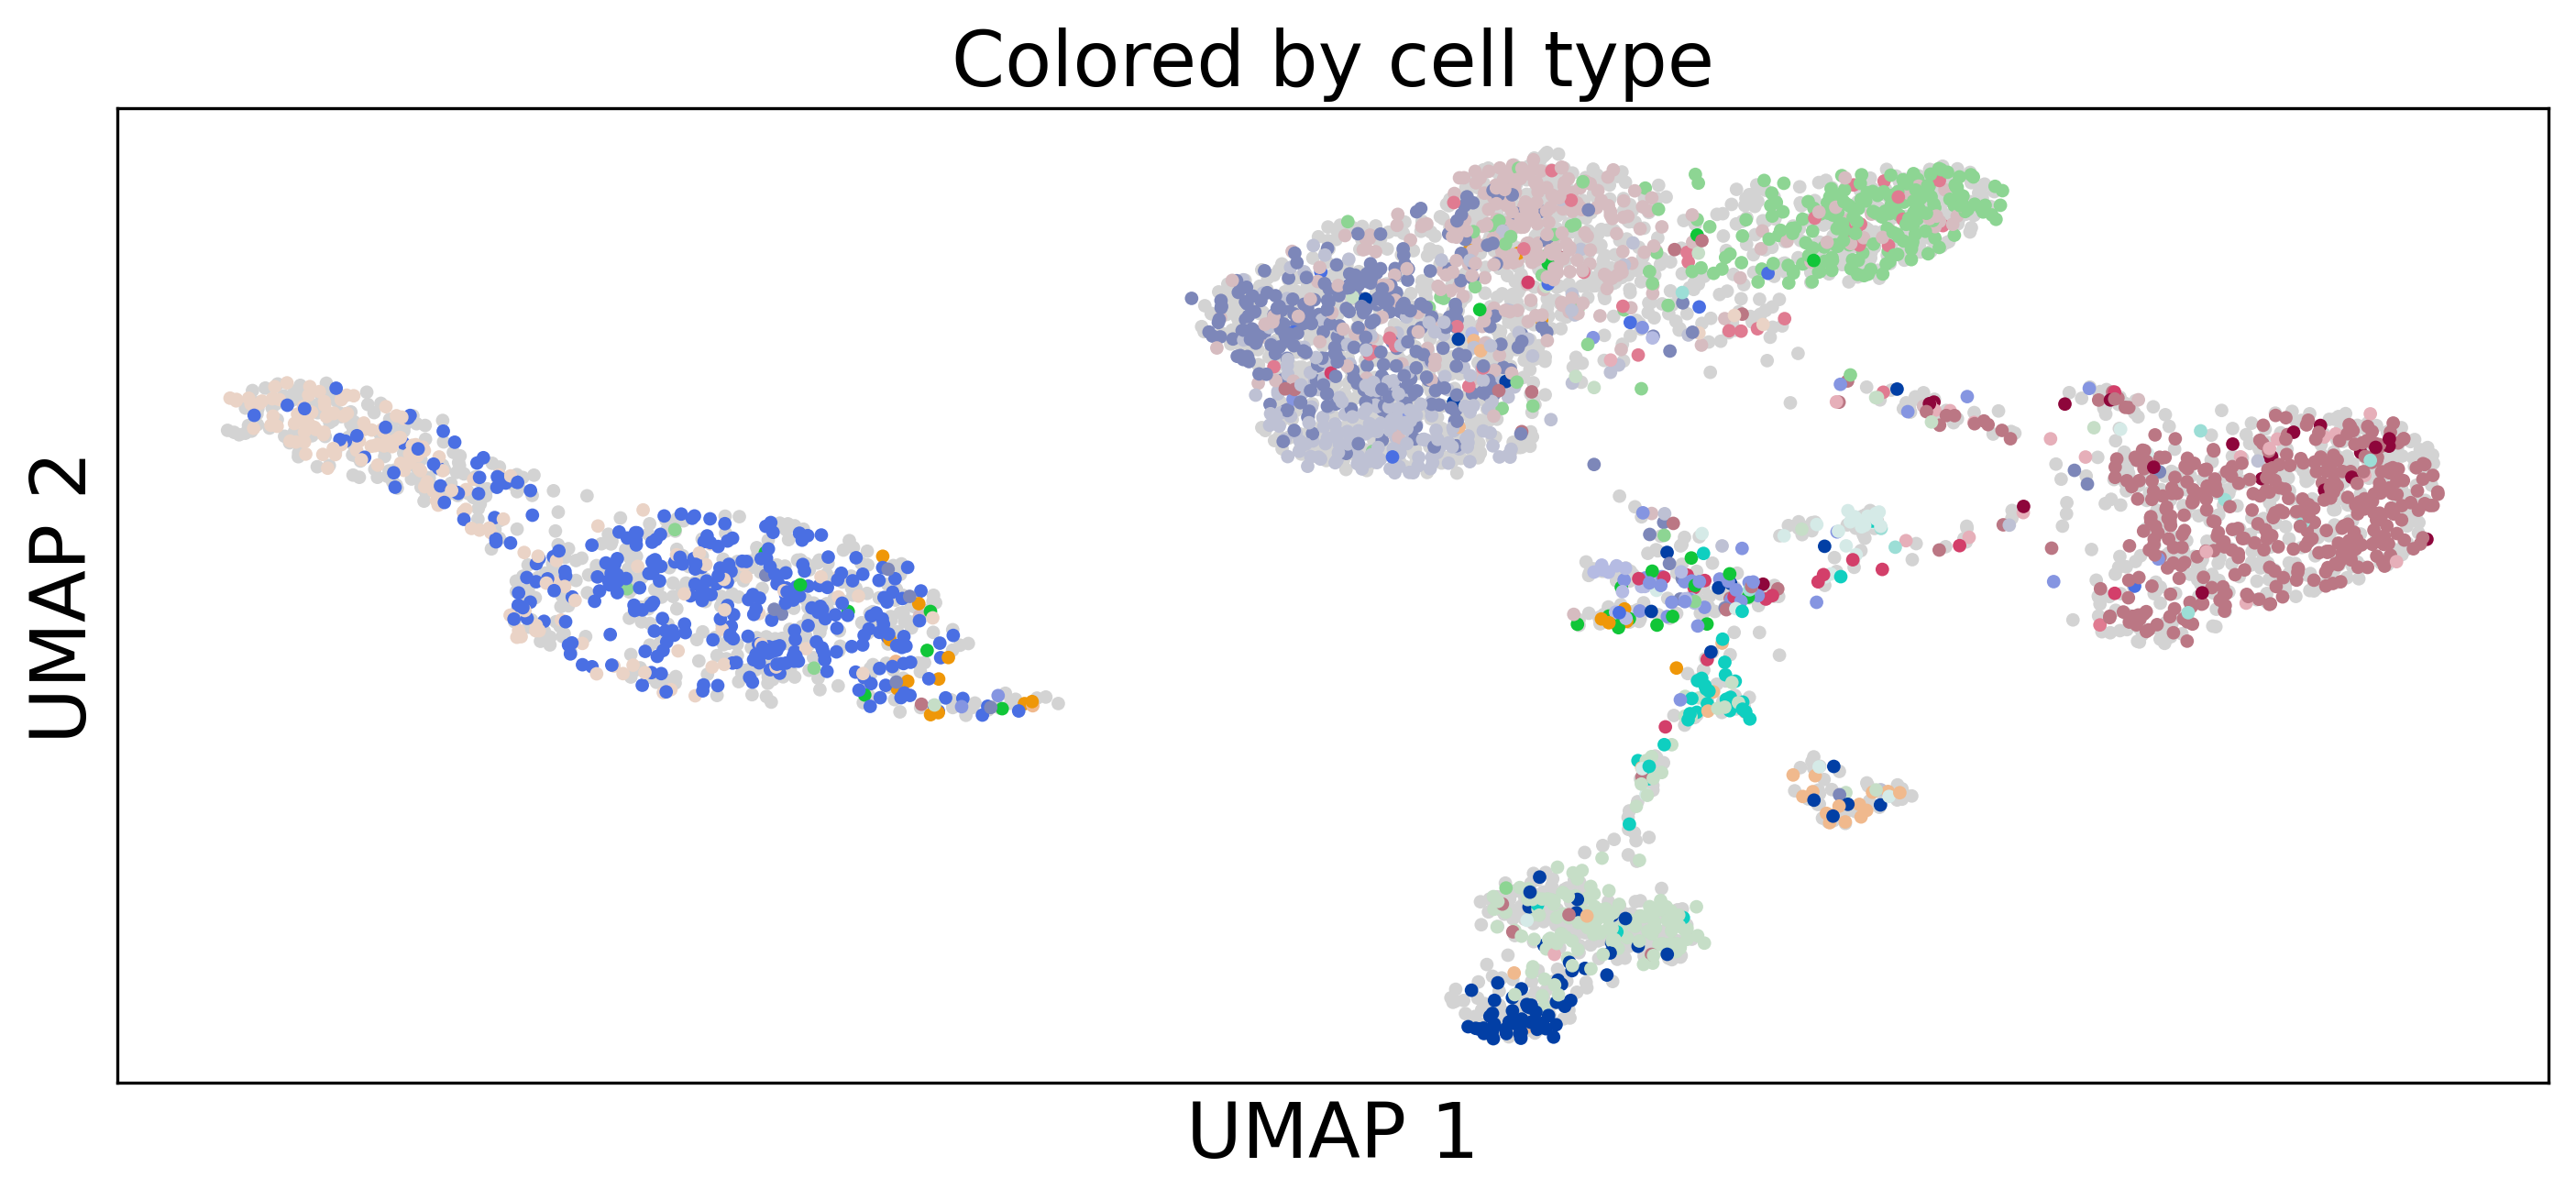

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
sc.pl.umap(adata_one_sample, color=["predicted_cell_type_only"], ax=ax, show=False, size=50, legend_fontsize=13)
ax.set_title("Colored by cell type", fontsize=20)
ax.set_xlabel('UMAP 1', fontsize=20)
ax.set_ylabel('UMAP 2', fontsize=20)

ax.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


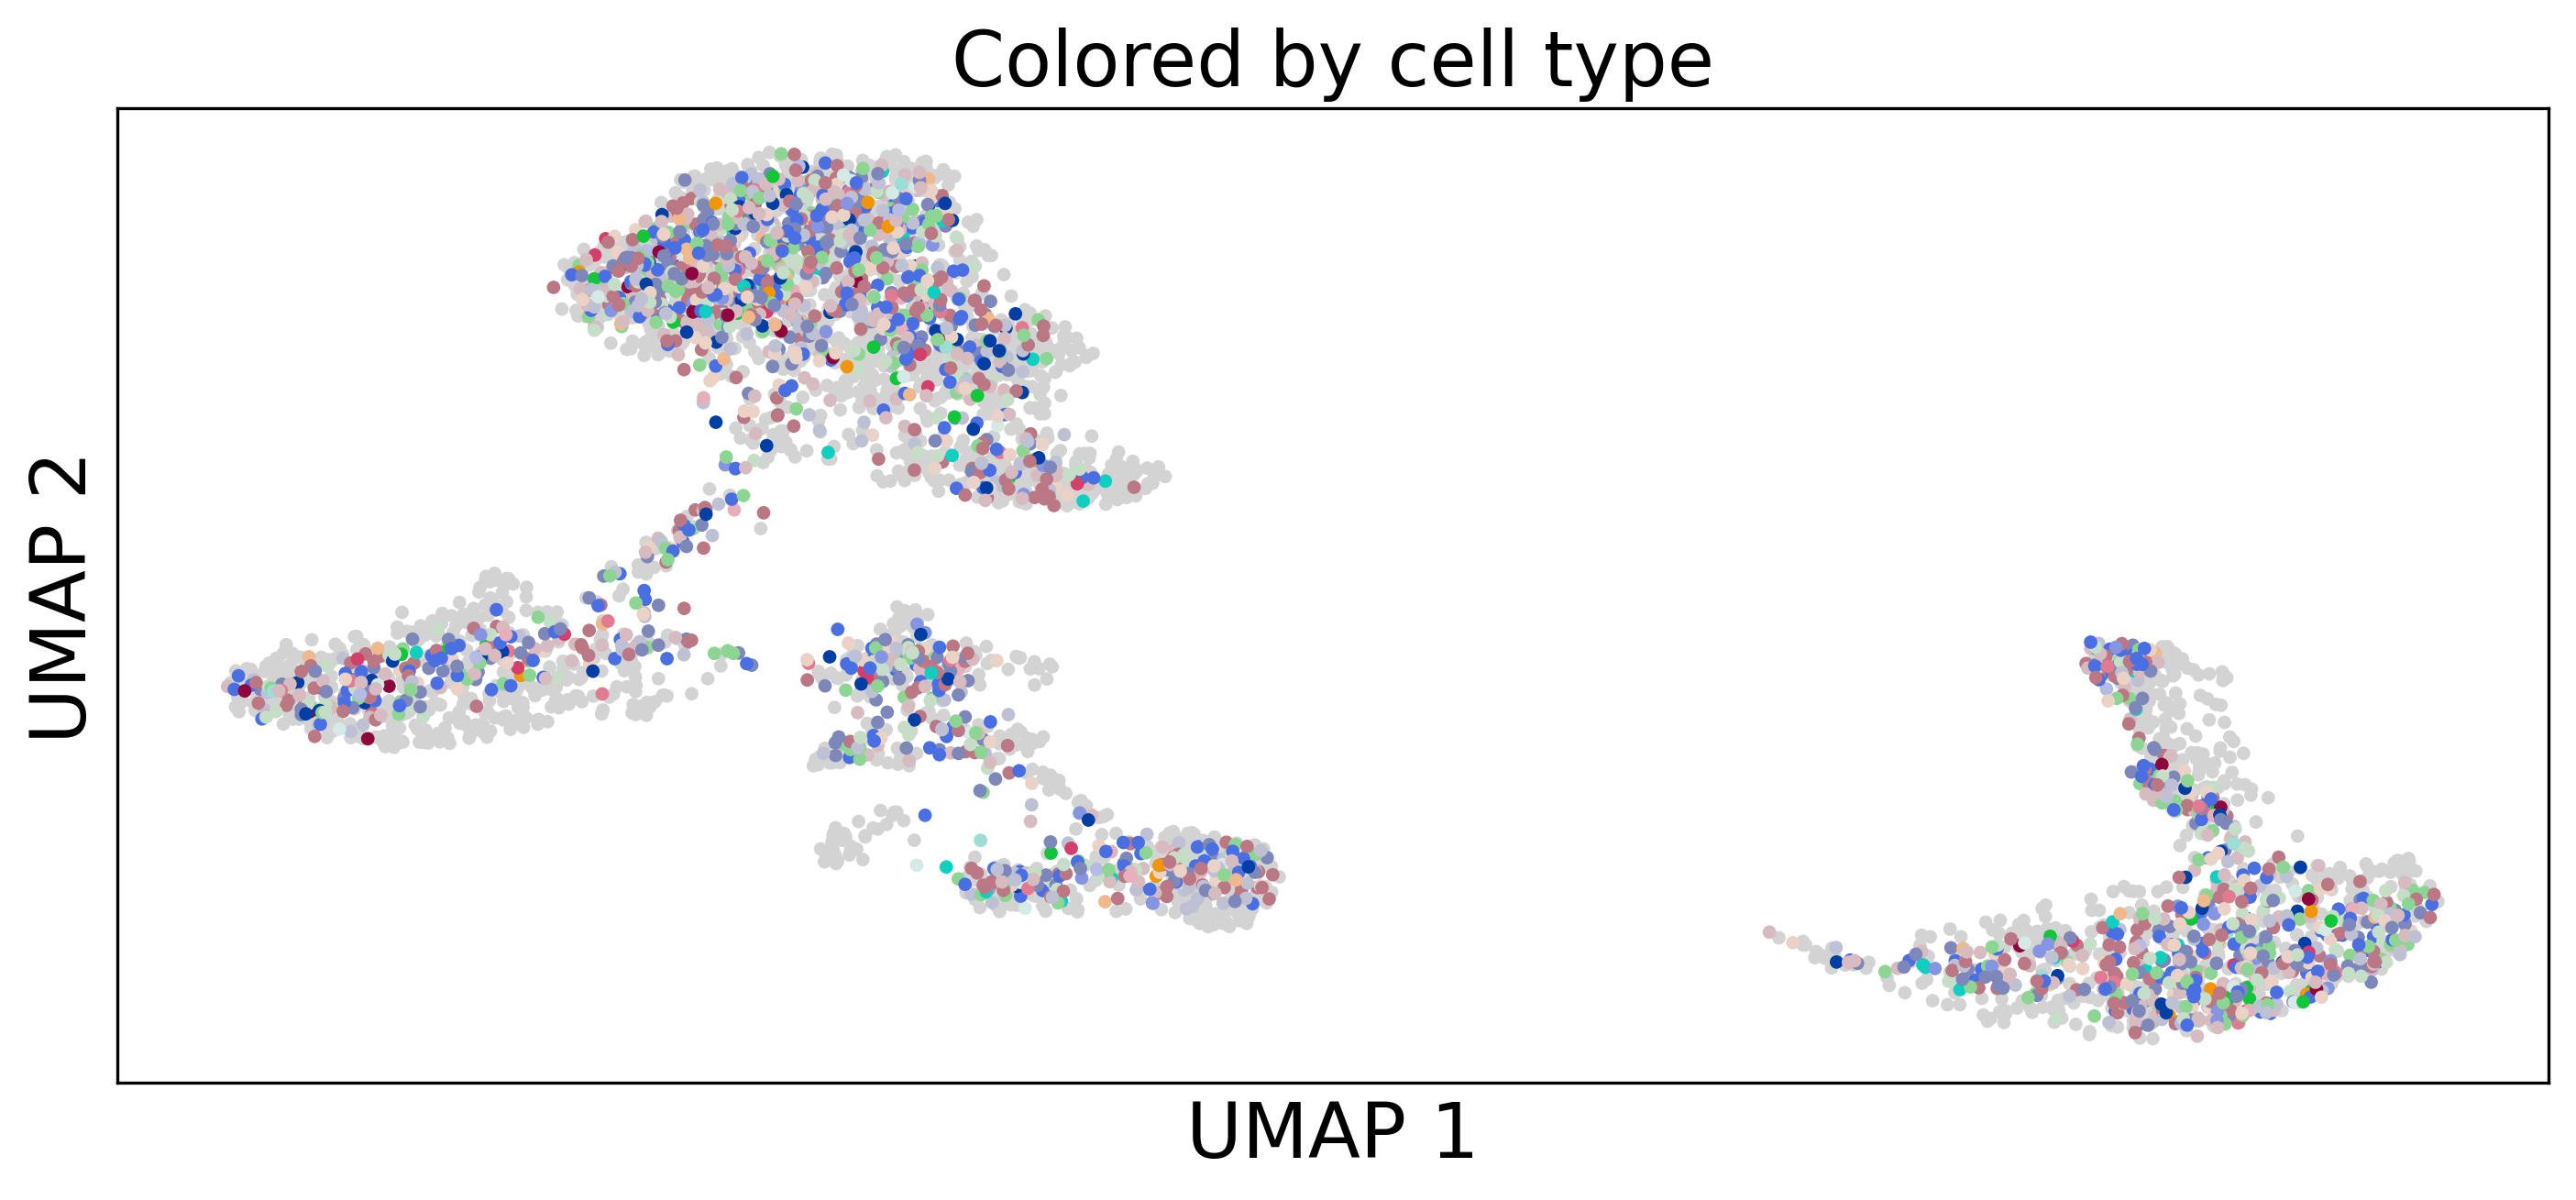

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
sc.pl.umap(adata_outer_coupling, color=["predicted_cell_type_only"], ax=ax, show=False, size=50, legend_fontsize=13)
ax.set_title("Colored by cell type", fontsize=20)
ax.set_xlabel('UMAP 1', fontsize=20)
ax.set_ylabel('UMAP 2', fontsize=20)

ax.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()